In [1]:
#import all the tools we need
#Regular exploratory data analysis and plotting libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#we want to plots to appear inside the notebook
%matplotlib inline
#models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
df=pd.read_csv('/flusk_app_intership/static/data/Training Data - Sheet1.csv')
df.shape

(545, 7)

In [3]:
df.head(10)

,SSC,Chemistry,HSC,Merit,JEE,Final,Admittance
0,94.73,78.0,87.69,95.993373,100,41,1
1,92.73,84.0,77.08,95.808911,120,41,1
2,95.27,49.0,76.15,90.411008,97,44,1
3,92.73,82.0,87.54,96.865900,114,46,1
4,89.09,76.0,85.54,91.979415,75,41,1
5,93.64,82.0,83.69,93.589722,95,26,0
6,79.82,53.0,70.00,73.695409,66,31,0
7,91.45,58.0,84.92,92.362200,85,40,1
8,86.80,73.0,85.54,94.208104,96,40,1
9,95.00,79.0,87.54,96.335207,113,49,1


In [4]:
df.tail(10)

,SSC,Chemistry,HSC,Merit,JEE,Final,Admittance
535,91.20,95.0,84.00,81.918110,67,36,1
536,79.27,58.0,68.15,66.351400,45,29,0
537,87.60,68.0,84.46,74.182199,38,52,1
538,84.36,61.0,69.08,81.924937,79,40,1
539,84.36,71.0,80.92,88.924400,70,29,0
540,77.20,82.0,78.80,52.649316,35,24,0
541,89.64,56.0,71.23,79.253704,59,38,1
542,85.20,67.0,75.23,89.201600,90,33,0
543,92.36,84.0,91.08,95.334700,92,41,1
544,94.55,78.0,82.15,90.075121,68,51,1


In [5]:
df['Admittance'].value_counts()

1    277
0    268
Name: Admittance, dtype: int64

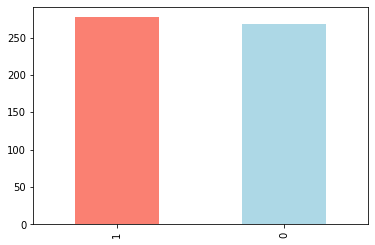

In [6]:
df['Admittance'].value_counts().plot(kind='bar',color=['salmon','lightblue']);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SSC         545 non-null    float64
 1   Chemistry   545 non-null    float64
 2   HSC         545 non-null    float64
 3   Merit       545 non-null    float64
 4   JEE         545 non-null    int64  
 5   Final       545 non-null    int64  
 6   Admittance  545 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 29.9 KB


In [8]:
#for checking missing values
df.isna().sum()

SSC           0
Chemistry     0
HSC           0
Merit         0
JEE           0
Final         0
Admittance    0
dtype: int64

In [9]:
df.describe()

,SSC,Chemistry,HSC,Merit,JEE,Final,Admittance
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,88.086991,71.181651,79.237083,3080.705085,69.359633,34.858716,0.508257
std,6.542388,13.585546,8.874950,21577.553746,31.519996,9.839159,0.500391
min,60.000000,38.000000,54.400000,19.636120,-10.000000,0.000000,0.000000
25%,85.090000,61.000000,73.080000,72.485951,46.000000,28.000000,0.000000
50%,89.640000,71.000000,80.310000,85.738836,68.000000,36.000000,1.000000
75%,92.910000,82.000000,86.460000,93.378181,89.000000,41.000000,1.000000
max,99.270000,98.000000,97.500000,383855.000000,178.000000,59.000000,1.000000


In [10]:
pd.crosstab(df.Merit,df.Admittance)

Admittance,0,1
Merit,,
19.636120,1,0
21.908614,0,1
22.586033,0,1
25.185700,1,0
25.761580,1,0
...,...,...
85728.000000,0,1
108396.000000,0,1
131848.000000,1,0


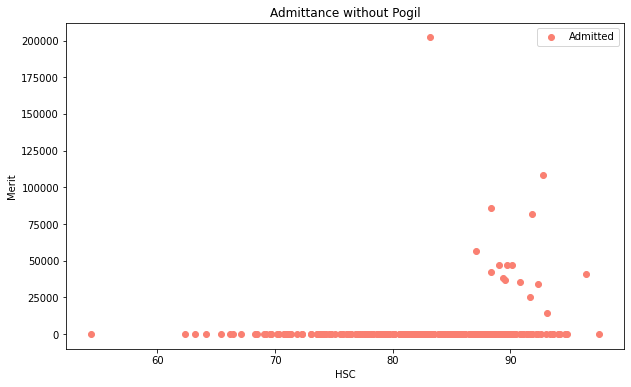

In [11]:
plt.figure(figsize=(10,6));
plt.scatter(df.HSC[df.Admittance==1],df.Merit[df.Admittance==1],c='salmon')
#plt.scatter(df.HSC[df.Admittance==0],df.Merit[df.Admittance==0],c='lightblue')
plt.title('Admittance without Pogil')
plt.xlabel('HSC')
plt.ylabel('Merit')
plt.legend(['Admitted','Not Admitted']);

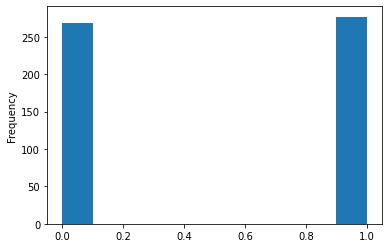

In [12]:
df.Admittance.plot.hist();

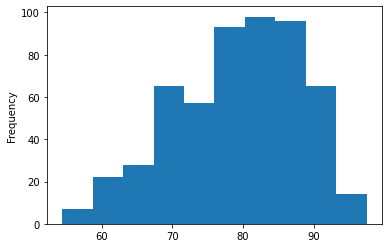

In [13]:
df.HSC.plot.hist();

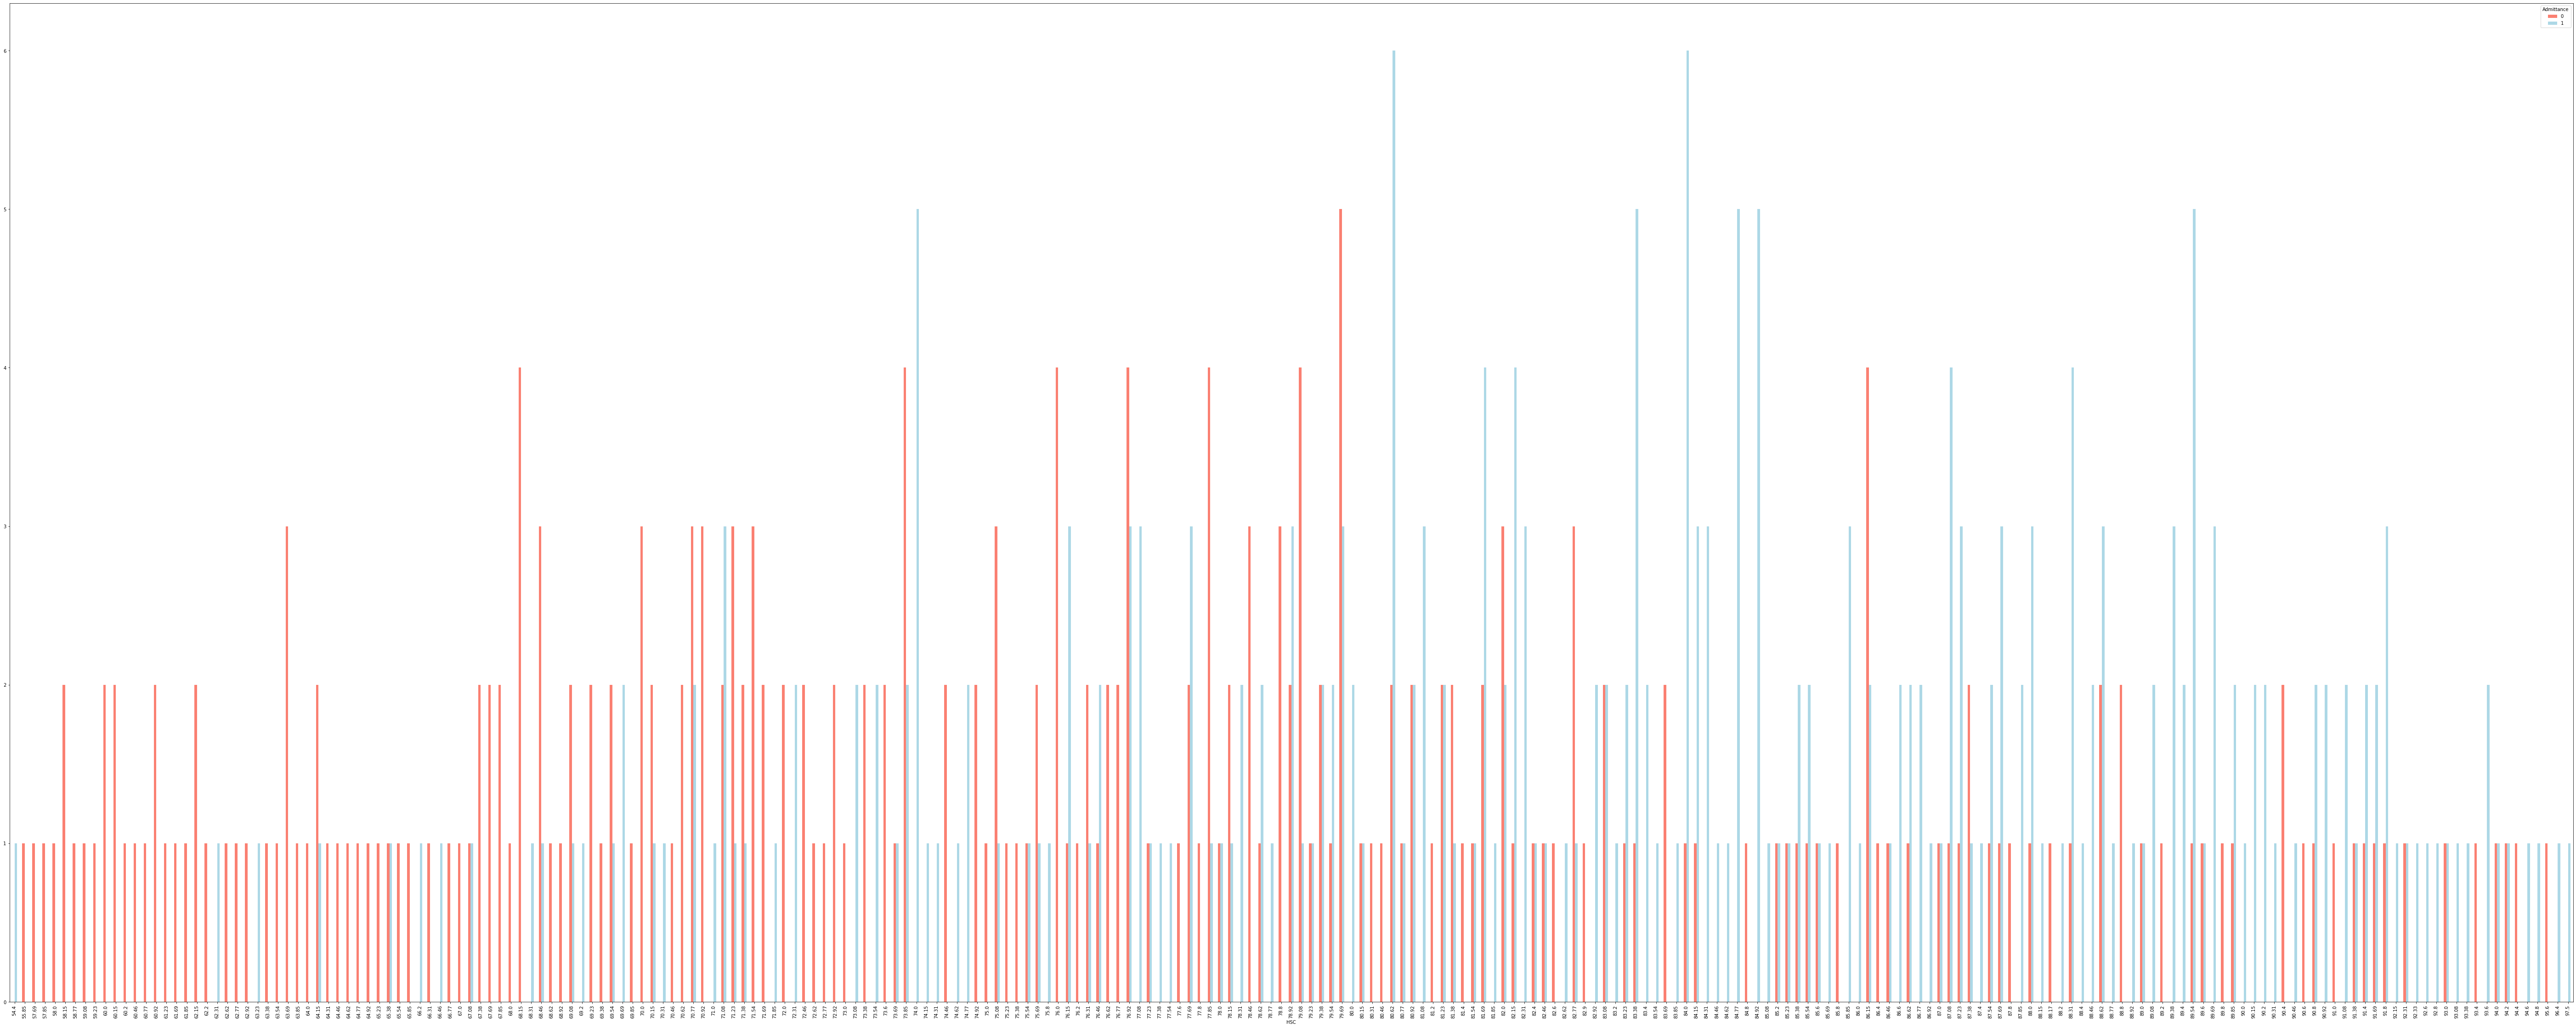

In [14]:
pd.crosstab(df.HSC,df.Admittance).plot(kind='bar',figsize=(100,40),color=['salmon','lightblue']);


In [15]:
df.corr()

,SSC,Chemistry,HSC,Merit,JEE,Final,Admittance
SSC,1.000000,0.479617,0.620480,0.045307,0.433723,0.346263,0.356879
Chemistry,0.479617,1.000000,0.837030,0.132963,0.538219,0.369498,0.316647
HSC,0.620480,0.837030,1.000000,0.156986,0.589161,0.431687,0.390065
Merit,0.045307,0.132963,0.156986,1.000000,0.054956,0.080213,0.019143
JEE,0.433723,0.538219,0.589161,0.054956,1.000000,0.265002,0.254236
Final,0.346263,0.369498,0.431687,0.080213,0.265002,1.000000,0.736326
Admittance,0.356879,0.316647,0.390065,0.019143,0.254236,0.736326,1.000000


(7.5, -0.5)

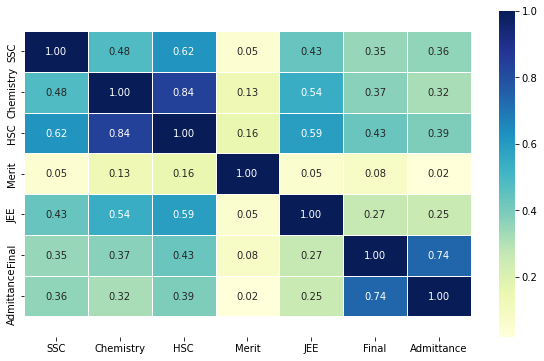

In [16]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(10,6))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,
               fmt='0.2f',
               cmap='YlGnBu')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

In [17]:
#split data into x and y 
x=df.drop('Admittance',axis=1)
y=df['Admittance']

In [18]:
x.head(10)

,SSC,Chemistry,HSC,Merit,JEE,Final
0,94.73,78.0,87.69,95.993373,100,41
1,92.73,84.0,77.08,95.808911,120,41
2,95.27,49.0,76.15,90.411008,97,44
3,92.73,82.0,87.54,96.865900,114,46
4,89.09,76.0,85.54,91.979415,75,41
5,93.64,82.0,83.69,93.589722,95,26
6,79.82,53.0,70.00,73.695409,66,31
7,91.45,58.0,84.92,92.362200,85,40
8,86.80,73.0,85.54,94.208104,96,40
9,95.00,79.0,87.54,96.335207,113,49


In [19]:
y.head(10)

0    1
1    1
2    1
3    1
4    1
5    0
6    0
7    1
8    1
9    1
Name: Admittance, dtype: int64

In [20]:
#split the data into train into test sets
np.random.seed(42)
#split into train $test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [21]:
x_train

,SSC,Chemistry,HSC,Merit,JEE,Final
46,87.27,85.0,88.62,92.827265,77,33
93,87.09,84.0,79.69,95.864900,99,51
335,94.18,72.0,88.46,92.308382,79,52
412,94.33,74.0,86.15,93.070800,88,42
471,94.00,91.0,83.40,87.017412,106,49
...,...,...,...,...,...,...
71,83.64,82.0,82.00,91.897466,74,26
106,90.36,90.0,84.00,98.573100,138,53
270,93.40,98.0,90.40,92.080074,97,34
435,65.82,59.0,68.62,74.408308,55,26


In [22]:
y_train


46     0
93     1
335    1
412    1
471    1
      ..
71     0
106    1
270    0
435    0
102    0
Name: Admittance, Length: 436, dtype: int64

In [23]:
#put the moddels in a dictionary
models={
    "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Random Forest classifier":RandomForestClassifier()
}
def fit_and_score(models,x_train,x_test,y_train,y_test):
  np.random.seed(42)
  model_scores={}
  for name,model in models.items():
    model.fit(x_train,y_train)
    model_scores[name]=model.score(x_test,y_test)

  return model_scores



In [24]:
model_scores=fit_and_score(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)
model_scores

c:\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8990825688073395,
 'KNN': 0.908256880733945,
 'Random Forest classifier': 0.9908256880733946}

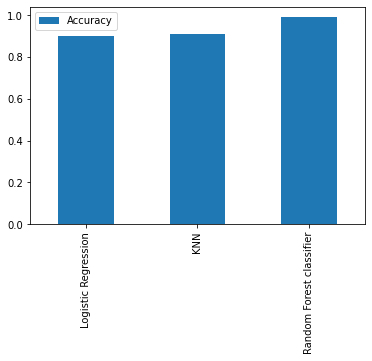

In [25]:
model_compare=pd.DataFrame(model_scores,index=['Accuracy'])
model_compare.T.plot.bar();

In [26]:
from sklearn import neighbors
#lets tune KNN
train_scores=[]
test_scores=[]

neighbors=range(1,21)
knn=KNeighborsClassifier()
for i in neighbors:
  knn.set_params(n_neighbors=i)
  knn.fit(x_train,y_train)
  train_scores.append(knn.score(x_train,y_train))
  test_scores.append(knn.score(x_test,y_test))

In [27]:
train_scores

[1.0,
 0.9311926605504587,
 0.9380733944954128,
 0.9128440366972477,
 0.9128440366972477,
 0.9013761467889908,
 0.9013761467889908,
 0.8967889908256881,
 0.8967889908256881,
 0.8922018348623854,
 0.8944954128440367,
 0.8876146788990825,
 0.8922018348623854,
 0.8830275229357798,
 0.8876146788990825,
 0.8899082568807339,
 0.8830275229357798,
 0.8876146788990825,
 0.8876146788990825,
 0.8853211009174312]

In [28]:
test_scores

[0.8715596330275229,
 0.8440366972477065,
 0.908256880733945,
 0.8990825688073395,
 0.908256880733945,
 0.908256880733945,
 0.908256880733945,
 0.908256880733945,
 0.9174311926605505,
 0.9174311926605505,
 0.926605504587156,
 0.9174311926605505,
 0.9174311926605505,
 0.9174311926605505,
 0.9174311926605505,
 0.9174311926605505,
 0.9174311926605505,
 0.9174311926605505,
 0.8990825688073395,
 0.8990825688073395]

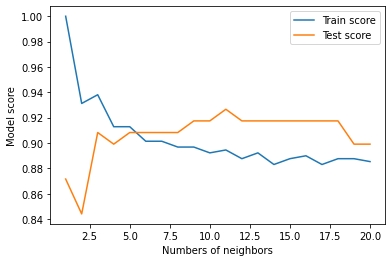

In [29]:
plt.plot(neighbors,train_scores,label='Train score')
plt.plot(neighbors,test_scores,label='Test score')
plt.xlabel('Numbers of neighbors')
plt.ylabel('Model score')
plt.legend();

In [30]:
log_reg_grid={
    "C":np.logspace(-4,4,20),
    "solver":["liblinear"]
}
# create a hyperparameter grid for randomforestclasifier
rf_grid={
    "n_estimators":np.arange(10,1000,50),
    "max_depth":[None,3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2)

}

In [31]:
#tune logistic regression
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [32]:
rs_log_reg.score(x_test,y_test)

0.9908256880733946

In [33]:
#set randomm hypermeter for random forest classifier
rs_rf=RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=rf_grid,
    cv=5,
    n_iter=20,
    verbose=True
)
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [34]:
y_preds=rs_log_reg.predict(x_test)

In [35]:
y_preds

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [36]:
y_test

316    1
77     0
360    1
90     1
493    0
      ..
15     1
357    1
39     0
54     0
155    0
Name: Admittance, Length: 109, dtype: int64

c:\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


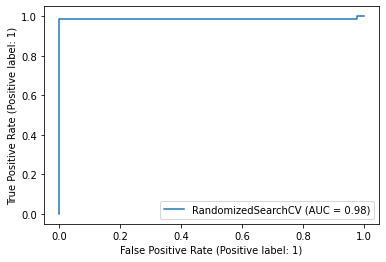

In [37]:
plot_roc_curve(rs_log_reg,x_test,y_test);

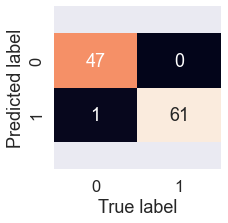

In [38]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
  fig,ax=plt.subplots(figsize=(3,3))
  ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
  plt.xlabel('True label')
  plt.ylabel('Predicted label')
  bottom,top=ax.get_ylim()
  ax.set_ylim(bottom+0.5,top-0.5)
plot_conf_mat(y_test,y_preds)

In [39]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       1.00      0.98      0.99        62

    accuracy                           0.99       109
   macro avg       0.99      0.99      0.99       109
weighted avg       0.99      0.99      0.99       109



In [42]:
import pickle
file=open('pogil2.pkl','wb')
pickle.dump(rs_log_reg,file)
file.close()

In [43]:
y_pred=rs_log_reg.predict((np.array([[87.27,	85.0,	88.62	,92.827265,	77,	33]])))
print('suggested answer',y_pred[0])

suggested answer 0


c:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
